In [1]:
import tensorflow as tf

# 导入Tensorflow提供的读取MNIST的模块
import tensorflow.examples.tutorials.mnist.input_data as input_data

# 读取MNIST数据
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# 建立模型
## 构建输入层
### 定义标签数据占位符

In [2]:
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

## 构建隐藏层

In [3]:
#隐藏层神经元数量
H1_NN = 256

W1 = tf.Variable(tf.random_normal([784, H1_NN]))
b1 = tf.Variable(tf.zeros([H1_NN]))

Y1 = tf.nn.relu(tf.matmul(x, W1) + b1)

## 构建输出层 

In [4]:
W2 = tf.Variable(tf.random_normal([H1_NN, 10]))
b2 = tf.Variable(tf.zeros([10]))

forward = tf.matmul(Y1, W2) + b2
pred = tf.nn.softmax(forward)

# 训练模型
### 定义损失函数

In [5]:
#交叉熵
#loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
#TF提供了结合Softmax的交叉熵损失函数定义方法 用于避免了结合Softmax的交叉熵损失函数定义方示
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=forward, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 设置训练参数

In [6]:
train_epochs = 40
batch_size = 50
total_batch = int(mnist.train.num_examples/batch_size)
display_step = 1
learning_rate = 0.01

### 选择优化器

In [7]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

### 定义准确率

In [8]:
correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
#记录训练开始时间
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)  #读取批次数据
        sess.run(optimizer,feed_dict={x: xs, y: ys}) #执行批次训练
        
    #total_batch个批次训练完成后，使用验证数据计算误差与准确率
    loss, acc = sess.run([loss_function, accuracy],feed_dict={x: mnist.validation.images,
                                                              y: mnist.validation.labels})
    if(epoch+1) % display_step ==0:
        print("Train Epoch:","%02d" % (epoch+1),
              "Loss=","{:.9f}".format(loss), " Accuracy=","{:.4f}".format(acc))
#运行总时间
duration = time()-startTime
print("Train Finished takes:","{:.2f}".format(duration))

Train Epoch: 01 Loss= 1.237000823  Accuracy= 0.9392
Train Epoch: 02 Loss= 0.693128169  Accuracy= 0.9474
Train Epoch: 03 Loss= 0.604890227  Accuracy= 0.9530
Train Epoch: 04 Loss= 0.549317002  Accuracy= 0.9478
Train Epoch: 05 Loss= 0.379881382  Accuracy= 0.9578
Train Epoch: 06 Loss= 0.371551991  Accuracy= 0.9624
Train Epoch: 07 Loss= 0.464116603  Accuracy= 0.9578
Train Epoch: 08 Loss= 0.336085767  Accuracy= 0.9652
Train Epoch: 09 Loss= 0.391270906  Accuracy= 0.9580
Train Epoch: 10 Loss= 0.400560200  Accuracy= 0.9636
Train Epoch: 11 Loss= 0.372445762  Accuracy= 0.9656
Train Epoch: 12 Loss= 0.370846927  Accuracy= 0.9684
Train Epoch: 13 Loss= 0.457030773  Accuracy= 0.9614
Train Epoch: 14 Loss= 0.405426502  Accuracy= 0.9698
Train Epoch: 15 Loss= 0.392412245  Accuracy= 0.9722
Train Epoch: 16 Loss= 0.460422307  Accuracy= 0.9678
Train Epoch: 17 Loss= 0.449868858  Accuracy= 0.9730
Train Epoch: 18 Loss= 0.428610951  Accuracy= 0.9694
Train Epoch: 19 Loss= 0.381829143  Accuracy= 0.9748
Train Epoch:

# 评估模型

In [10]:
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy:", accu_test)

Test Accuracy: 0.9729


# 进行预测

In [11]:
#由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字。
prediction_result=sess.run(tf.argmax(pred,1), feed_dict={x: mnist.test.images})

In [12]:
#查看预测结果中的前10项
prediction_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

# 定义可视化函数

In [13]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,     #图像列表
                                  labels,     #标签列表
                                  prediction, #预测值列表
                                  index,      #从第index个开始显示
                                  num=10):    #缺省一次显示10幅
    fig = plt.gcf() #获取当前图表,Get Current Figure
    fig.set_size_inches(10,12) #1英寸等于2.54cm
    if num > 25:
        num = 25                #最多显示25个子图
    for i in range(0, num):
        ax = plt.subplot(5,5, i+1) #获取当前要处理的子图
        ax.imshow(np.reshape(images[index],(28, 28)),cmap='binary')
        
        title = "label=" + str(np.argmax(labels[index])) #构建该图上要显示的title
        
        if len(prediction)>0:
            title += ",predict=" + str(prediction[index])
            
        ax.set_title(title,fontsize=10) #显示图上的title信息
        ax.set_xticks([]); #不显示坐标轴
        ax.set_yticks([])
        index += 1
    plt.show()

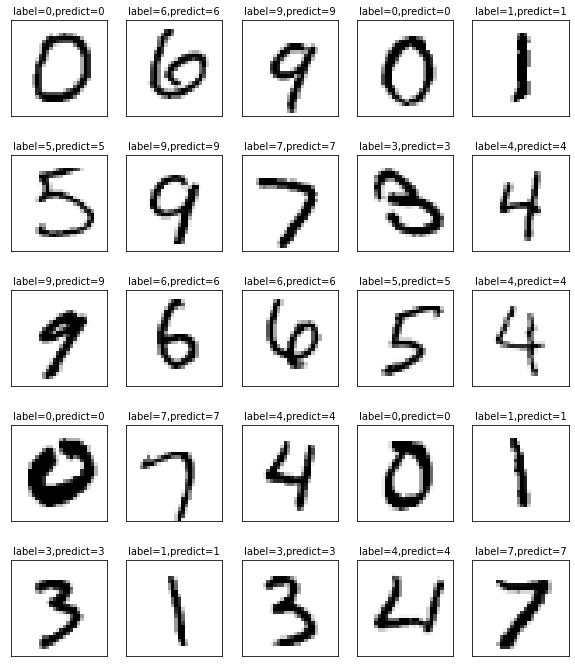

In [14]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,10,25)

# 找出预测错误

In [15]:
import numpy as np
compare_lists = prediction_result==np.argmax(mnist.test.labels,1) 
print(compare_lists)

[ True  True  True ...  True  True  True]


In [16]:
err_lists = [i for i in range(len(compare_lists)) if compare_lists[i]==False]
print(err_lists, len(err_lists))

[8, 115, 211, 241, 247, 268, 321, 381, 445, 448, 495, 543, 582, 591, 603, 610, 619, 691, 717, 720, 839, 844, 846, 882, 900, 947, 951, 965, 1014, 1039, 1107, 1112, 1156, 1166, 1202, 1226, 1232, 1242, 1247, 1299, 1319, 1328, 1395, 1425, 1433, 1438, 1494, 1522, 1530, 1549, 1553, 1621, 1641, 1669, 1681, 1709, 1751, 1790, 1843, 1878, 1901, 1911, 1968, 2001, 2004, 2016, 2018, 2035, 2040, 2070, 2093, 2098, 2109, 2129, 2130, 2135, 2162, 2182, 2215, 2224, 2237, 2272, 2293, 2329, 2369, 2387, 2405, 2406, 2414, 2426, 2441, 2454, 2462, 2488, 2573, 2597, 2607, 2654, 2684, 2720, 2730, 2769, 2770, 2810, 2823, 2829, 2877, 2896, 2921, 2939, 2945, 3005, 3012, 3073, 3115, 3117, 3225, 3284, 3289, 3369, 3405, 3475, 3490, 3503, 3520, 3558, 3597, 3604, 3674, 3767, 3776, 3778, 3780, 3796, 3808, 3818, 3850, 3853, 3893, 3906, 3941, 3970, 3971, 3985, 3987, 3988, 4000, 4002, 4065, 4075, 4078, 4140, 4156, 4167, 4176, 4177, 4201, 4248, 4271, 4289, 4294, 4344, 4355, 4359, 4374, 4382, 4425, 4433, 4437, 4477, 4497, 450

# 定义一个输出错误分类的函数

In [17]:
def print_predict_errs(labels,      #标签列表
                       prediction): #预测值列表
    count = 0
    compare_lists = (prediction==np.argmax(labels,1))
    err_lists = [i for i in range(len(compare_lists)) if compare_lists[i]==False]
    for x in err_lists:
        print("index="+str(x)+ 
              " 标签值=",np.argmax(labels[x]),
              "预测值=",prediction[x])
        count = count + 1
    print("总计:"+str(count))

In [18]:
print_predict_errs(labels=mnist.test.labels,
                   prediction=prediction_result)

index=8 标签值= 5 预测值= 6
index=115 标签值= 4 预测值= 9
index=211 标签值= 5 预测值= 3
index=241 标签值= 9 预测值= 3
index=247 标签值= 4 预测值= 2
index=268 标签值= 8 预测值= 9
index=321 标签值= 2 预测值= 7
index=381 标签值= 3 预测值= 7
index=445 标签值= 6 预测值= 0
index=448 标签值= 9 预测值= 3
index=495 标签值= 8 预测值= 0
index=543 标签值= 8 预测值= 4
index=582 标签值= 8 预测值= 2
index=591 标签值= 8 预测值= 3
index=603 标签值= 8 预测值= 5
index=610 标签值= 4 预测值= 2
index=619 标签值= 1 预测值= 3
index=691 标签值= 8 预测值= 4
index=717 标签值= 0 预测值= 6
index=720 标签值= 5 预测值= 8
index=839 标签值= 8 预测值= 3
index=844 标签值= 8 预测值= 7
index=846 标签值= 7 预测值= 9
index=882 标签值= 9 预测值= 7
index=900 标签值= 1 预测值= 3
index=947 标签值= 8 预测值= 9
index=951 标签值= 5 预测值= 4
index=965 标签值= 6 预测值= 0
index=1014 标签值= 6 预测值= 5
index=1039 标签值= 7 预测值= 1
index=1107 标签值= 9 预测值= 8
index=1112 标签值= 4 预测值= 6
index=1156 标签值= 7 预测值= 8
index=1166 标签值= 3 预测值= 5
index=1202 标签值= 8 预测值= 6
index=1226 标签值= 7 预测值= 2
index=1232 标签值= 9 预测值= 6
index=1242 标签值= 4 预测值= 9
index=1247 标签值= 9 预测值= 3
index=1299 标签值= 5 预测值= 7
index=1319 标签值= 8 预测值= 3
index